# HUHU@IberLEF2023 Task 2a (Multi-label Classification - Graphs)

## Libraries

In [1]:
import os
import json
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import numpy as np

## Environment

In [2]:
EXP_NAME = "exp0"
PATH = os.getcwd() + "\\experiments\\" + EXP_NAME

In [3]:
PATHS_TRANSFORMERS_LIST = []
for i in os.walk(PATH):
    PATHS_TRANSFORMERS_LIST.append(i[0])
PATHS_TRANSFORMERS_LIST = PATHS_TRANSFORMERS_LIST[2:]

In [4]:
PATH_BEST_ENSEMBLE = PATH + "\\best-ensemble.json"

In [5]:
PATH_TEST_PREDICTIONS = PATH + "\\test-predictions.csv"

In [6]:
PATHS_EVALUATUONS_LIST = []
for i in PATHS_TRANSFORMERS_LIST:
    PATHS_EVALUATUONS_LIST.append((i + "\\model-evaluation.json"))

In [7]:
with open(PATH_BEST_ENSEMBLE) as file:
    best_ensemble = json.load(file)

In [8]:
test_predictions = pd.read_csv(PATH_TEST_PREDICTIONS)

In [9]:
transformers = []
for i in PATHS_EVALUATUONS_LIST:
    name = re.search(r"(?<=\\)[^\\]+(?=\\model-evaluation.json)", i).group(0)
    with open(i, encoding = "utf8") as file:
        globals()[name] = json.load(file)
    transformers.append(name)

## Graphs

In [10]:
LABELS = ["Woman", "LGBTIQ", "Inmigrant Race", "Fatphobia"]

### Classification report

In [11]:
array_labels = []
for i in test_predictions["labels"].tolist():
    arr = np.array(eval(i))
    array_labels.append(arr)

In [12]:
array_predicted_labels = []
for i in test_predictions["predicted_labels"].tolist():
    arr = np.array(eval(i))
    array_predicted_labels.append(arr)

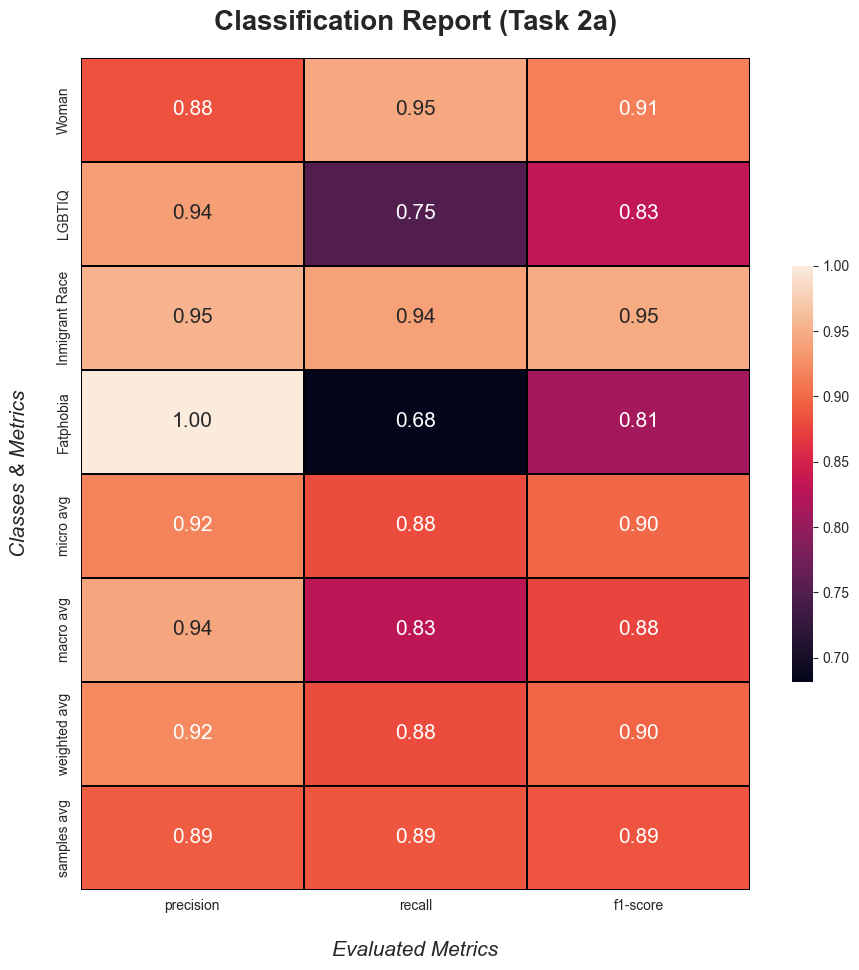

In [13]:
cr = classification_report(y_true = array_labels, y_pred = array_predicted_labels, target_names = LABELS, output_dict = True, zero_division = 0)
fig_cr = plt.figure(figsize = (10.8, 10.8))


sb.heatmap(pd.DataFrame(cr).iloc[:-1, :].T, annot = True, fmt = ".2f", cbar_kws = {"shrink": 0.5}, annot_kws = {"size": 15}, linecolor = "black", linewidth = 0.1)
plt.xlabel("Evaluated Metrics", fontsize = 15, labelpad = 20, style = "italic")
plt.ylabel("Classes & Metrics", fontsize = 15, labelpad = 20, style = "italic")
plt.title("Classification Report (Task 2a)", fontsize = 20, pad = 20, weight = "bold")


fig_cr.savefig(os.path.join(PATH + "\\!graphs", "CLASSIFICATION_REPORT-T2A.png"))
fig_cr.savefig(os.path.join(PATH + "\\!graphs", "CLASSIFICATION_REPORT-T2A.pdf"))
plt.show()

### Confussion Matrixes

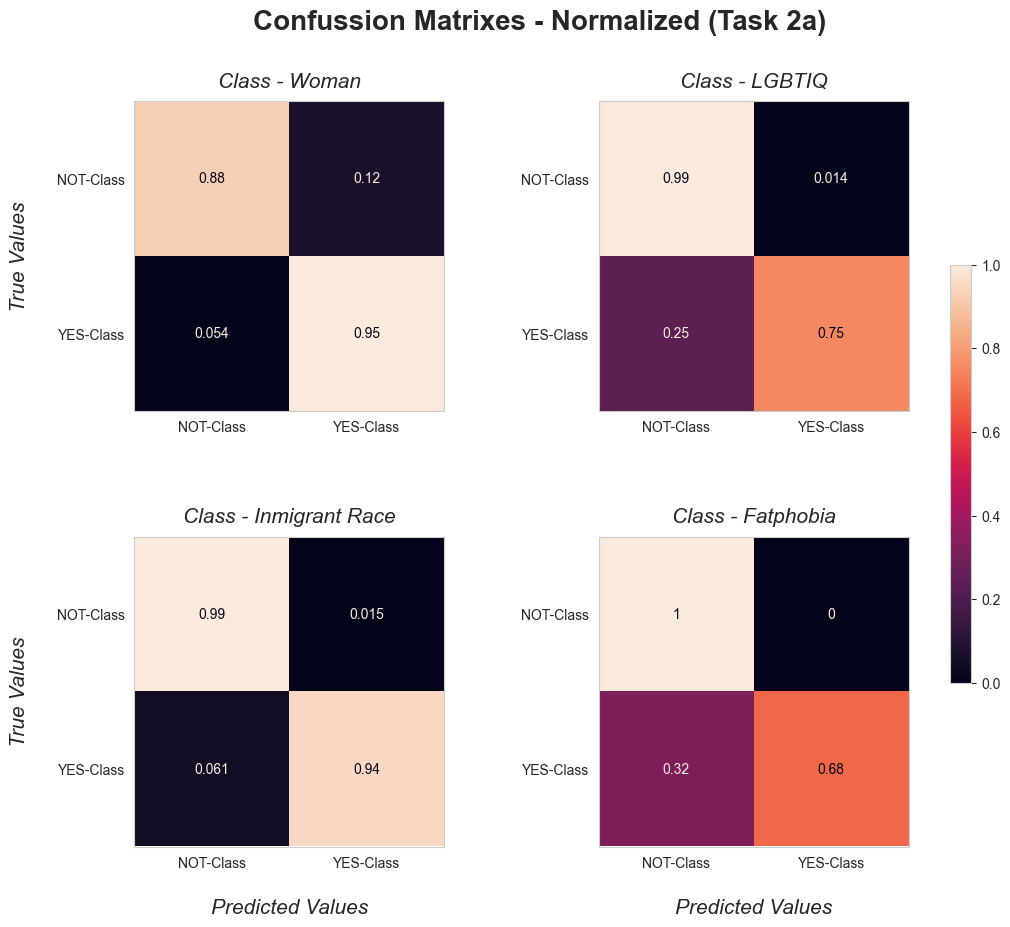

In [14]:
fig_cm, axes_cm = plt.subplots(2, 2, figsize = (10.8, 10.8))
axes_cm_ravel = axes_cm.ravel()


for i in range(len(LABELS)):
    y_true = [label[i] for label in array_labels]
    y_pred = [label[i] for label in array_predicted_labels]
    disp = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred, normalize = "true"), display_labels = [f"NOT-Class", f"YES-Class"])
    disp.plot(ax = axes_cm_ravel[i], cmap = "rocket")
    disp.ax_.set_title("Class - {}".format(LABELS[i]), fontsize = 15, pad = 10, style = "italic")
    if i<2:
        disp.ax_.set_xlabel("")
    else:
        disp.ax_.set_xlabel("Predicted Values", fontsize = 15, labelpad = 20, style = "italic")
    if i%2!=0:
        disp.ax_.set_ylabel("")
    else:
        disp.ax_.set_ylabel("True Values", fontsize = 15, labelpad = 20, style = "italic")
    disp.im_.colorbar.remove()
    disp.ax_.grid(False)

plt.subplots_adjust(wspace = 0.5, hspace = 0.1)
fig_cm.colorbar(disp.im_, ax = axes_cm_ravel, fraction = 0.025, pad = 0.05)
plt.suptitle("Confussion Matrixes - Normalized (Task 2a)", fontsize = 20, y = 0.925, weight = "bold")


fig_cm.savefig(os.path.join(PATH + "\\!graphs", "CONFUSION-MATRIXES-T2A.png"))
fig_cm.savefig(os.path.join(PATH + "\\!graphs", "CONFUSION-MATRIXES-T2A.pdf"))
plt.show()

### ROC curves

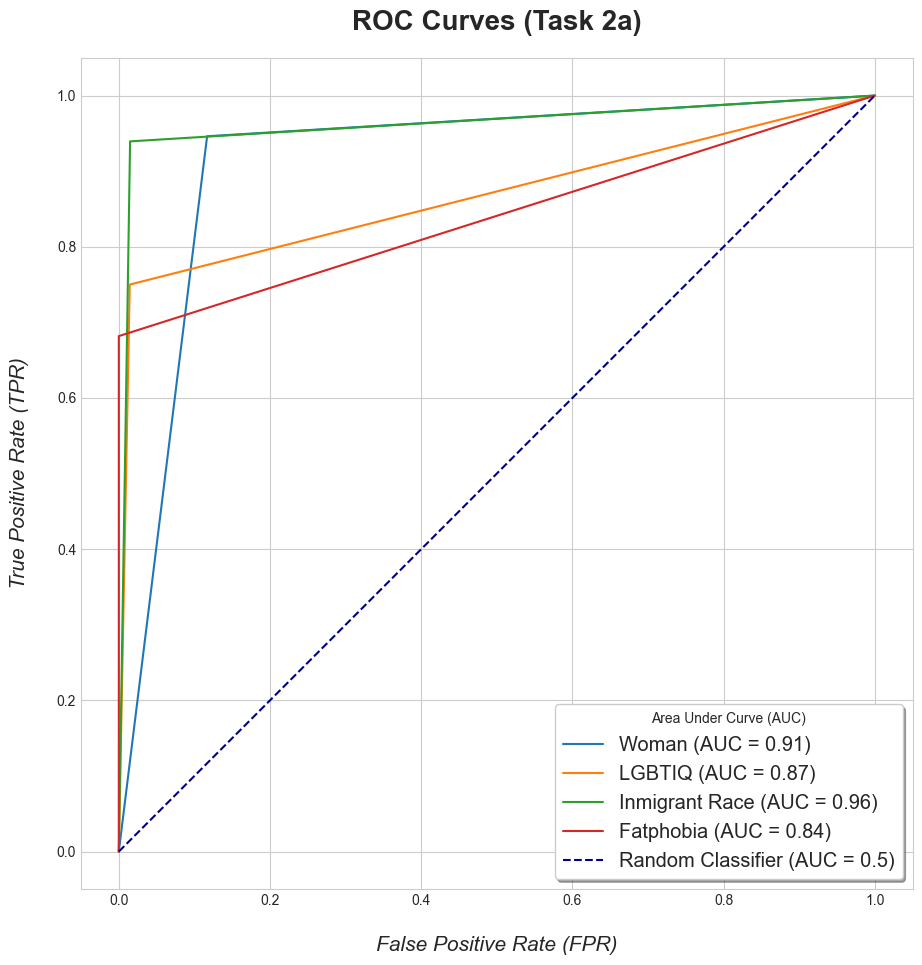

In [15]:
fig_roc = plt.figure(figsize = (10.8, 10.8))


for i in range(len(LABELS)):
    y_true = [label[i] for label in array_labels]
    y_pred = [label[i] for label in array_predicted_labels]
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    plt.plot(fpr, tpr, label = "{} (AUC = {:0.2f})".format(LABELS[i], auc(fpr, tpr)))


plt.plot([0, 1], [0, 1], color = "darkblue", linestyle = "--", label = "Random Classifier (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate (FPR)", fontsize = 15, labelpad = 20, style = "italic")
plt.ylabel("True Positive Rate (TPR)", fontsize = 15, labelpad = 20, style = "italic")
plt.title("ROC Curves (Task 2a)", fontsize = 20, pad = 20, weight = "bold")
plt.tick_params(axis = "y", direction = "in")
plt.tick_params(axis = "x", direction = "in")
plt.legend(title = "Area Under Curve (AUC)", loc = "lower right", fontsize = "x-large", shadow = True)


fig_roc.savefig(os.path.join(PATH + "\\!graphs", "ROC-T2A.png"))
fig_roc.savefig(os.path.join(PATH + "\\!graphs", "ROC-T2A.pdf"))
plt.show()

### All Transformers

In [16]:
data = {}
for i in transformers:
    data[i] = globals()[i]["metrics"]

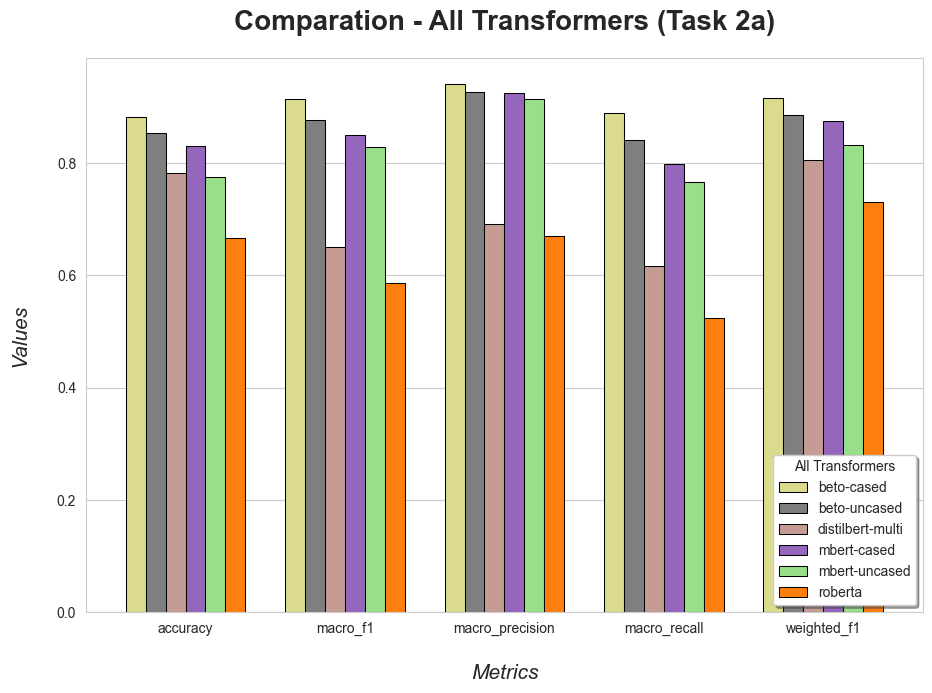

In [17]:
dataframe = pd.DataFrame(data)
fig_mc, ax_mc = plt.subplots(figsize = (10.8, 7.2))


dataframe.plot(kind = "bar", ax = ax_mc, color = sb.color_palette("tab20_r"), width = 0.75, edgecolor = "black", linewidth = 3/4)
ax_mc.xaxis.grid(False)
plt.xlabel("Metrics", fontsize = 15, labelpad = 20, style = "italic")
plt.xticks(rotation = 0)
plt.ylabel("Values", fontsize = 15, labelpad = 20, style = "italic")
plt.title("Comparation - All Transformers (Task 2a)", fontsize = 20, pad = 20, weight = "bold")
ax_mc.legend(title = "All Transformers", loc = "lower right", fontsize = "medium", shadow = True)


fig_mc.savefig(os.path.join(PATH + "\\!graphs", "COMPARATION-T2A.png"))
fig_mc.savefig(os.path.join(PATH + "\\!graphs", "COMPARATION-T2A.pdf"))
plt.show()

### Ensemble Ponderation Votation

In [18]:
macro_f1_summs = 0
for i in best_ensemble["models"]:
    macro_f1_summs += globals()[i]["metrics"]["macro_f1"]

In [19]:
votation_values = []
for i in best_ensemble["models"]:
    votation_values.append(globals()[i]["metrics"]["macro_f1"] / macro_f1_summs)

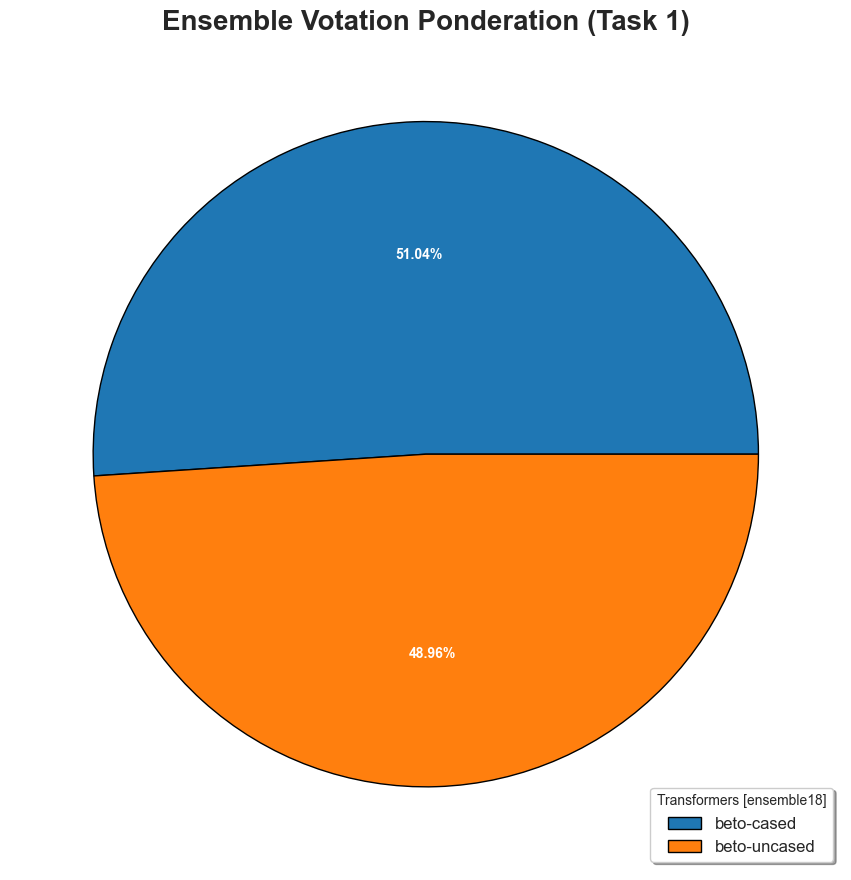

In [20]:
fig_votation, ax_votation= plt.subplots(figsize = (10.8, 10.8))


plt.pie(votation_values, labels = best_ensemble["models"], autopct = '%1.2f%%', textprops = {"fontsize": 10, "weight": "bold", "color": "white"}, wedgeprops = {"linewidth": 1, "edgecolor": "black"})


plt.title("Ensemble Votation Ponderation (Task 1)", fontsize = 20, weight = "bold")
plt.legend(title = "Transformers [" + best_ensemble["name"] + "]", loc = "lower right", fontsize = "large", shadow = True)
plt.axis("off")
ax_votation.set_frame_on(False)


fig_votation.savefig(os.path.join(PATH + "\\!graphs", "ENSEMBLE-VOTATION-T2A.png"))
fig_votation.savefig(os.path.join(PATH + "\\!graphs", "ENSEMBLE-VOTATION-T2A.pdf"))
plt.show()